<a href="https://colab.research.google.com/github/miz-ab/Twitter-Data-Analysis/blob/main/day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd

In [76]:
data = pd.read_csv("https://raw.githubusercontent.com/NatnaelSisay/task-2/master/output.csv");

print(data.sample(10))

      Unnamed: 0  ...                    place
2506        2506  ...                      NaN
669          669  ...               Denver, CO
1653        1653  ...                      NaN
1955        1955  ...                      NaN
1511        1511  ...                     N/Ao
6169        6169  ...  Cape Town, South Africa
5638        5638  ...                      NaN
5750        5750  ...             Exchange 👉👉👉
4147        4147  ...                      NaN
3082        3082  ...                 Paraguay

[10 rows x 16 columns]


In [77]:
cleanTweet = data[['original_text', 'polarity']].rename({'original_text': 'clean_text'}, axis=1)
cleanTweet.sample(10)

,clean_text,polarity
480,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2716,"Hi Jamaica,\n\nFYI Cuba- the smallest Latin Am...",0.000000
5283,Pin Code:[411041] \nNavale Medical College\nVa...,-0.375000
3673,"204,344 #COVID19 vaccines have been administer...",0.337500
5318,How??? With the data coming out it's showing t...,0.066667
2812,Zweli please just release the graphic designer...,0.000000
4160,"Transplant recipients, hope is on the way. \n\...",0.200000
3581,Informative thread on getting #COVID19 vaccine...,0.000000
2474,Some good news for Friday. Yesterday we had ou...,0.155556
4996,"Breaking: 410,000 Moderna #COVID19 vaccines wi...",0.050000


In [78]:
cleanTweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  6532 non-null   object 
 1   polarity    6532 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.2+ KB


In [79]:
def text_category(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'

In [80]:
cleanTweet['score'] = cleanTweet["polarity"].map(text_category)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns 

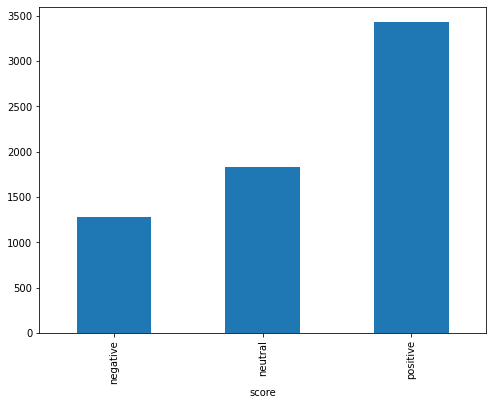

In [82]:
fig,axis=plt.subplots(figsize=(8,6))
cleanTweet.groupby('score')['clean_text'].count().plot.bar(ax=axis)

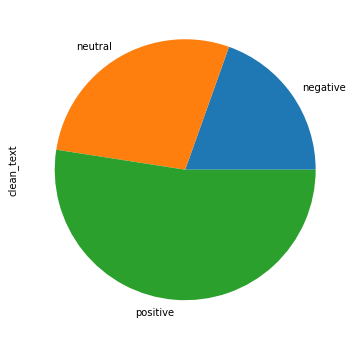

In [83]:
fig,axis=plt.subplots(figsize=(8,6))
cleanTweet.groupby('score')['clean_text'].count().plot.pie(ax=axis)

In [84]:
#remove rows from cleanTweet where polarity = 0

cleanTweet = cleanTweet[cleanTweet['polarity'] != 0]

cleanTweet.reset_index(drop=True, inplace=True)
cleanTweet.head()

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


In [85]:
def get_score(v):
    if v == 'positive':
      return 1
    else:
      return 0
    
cleanTweet['scoremap'] = cleanTweet['score'].map(get_score)
cleanTweet.head()

,clean_text,polarity,score,scoremap
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive,1
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive,1
2,Thank you @research2note for creating this ama...,0.316667,positive,1
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1
4,I think it’s important that we don’t sell COVA...,0.280000,positive,1


In [86]:
X = cleanTweet['clean_text'] #for clean_text
y = cleanTweet['scoremap'] #for scoremap

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [89]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
cv = CountVectorizer(ngram_range=(3, 3))
X_train_cv = cv.fit_transform(x_train)
X_test_cv = cv.transform(x_test)
X_train_cv

<3527x22980 sparse matrix of type '<class 'numpy.int64'>'
	with 114818 stored elements in Compressed Sparse Row format>

In [91]:
clf = SGDClassifier()
clf.fit(X_train_cv, y_train)
predictions = clf.predict(X_test_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:295: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
results = confusion_matrix(y_test, predictions) 
results

array([[280,  47],
       [  2, 847]])

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, predictions)

0.9583333333333334

In [96]:
from sklearn. metrics import classification_report

In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       327
           1       0.95      1.00      0.97       849

    accuracy                           0.96      1176
   macro avg       0.97      0.93      0.95      1176
weighted avg       0.96      0.96      0.96      1176



In [98]:
import numpy as np
import json
import glob
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#spacy
import spacy
from nltk.corpus import stopwords




In [ ]:
!pip install pyLDAvis

In [100]:
import nltk

In [101]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
stopwords = stopwords.words("english")

In [103]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [104]:
tweet = data[['original_text']]

In [ ]:
print(tweet.sample(10))

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(tweet)


In [ ]:
print (lemmatized_texts)

In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words)